In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
x=np.array([1,2,3,4,5])
y=np.array([3,4,2,4,5])

In [3]:
dic={'x':x,'y':y}
df=pd.DataFrame(dic)
df

,x,y
0,1,3
1,2,4
2,3,2
3,4,4
4,5,5


In [4]:
xmean=df['x'].mean()
ymean=df['y'].mean()
m=sum((x-xmean)*(y-ymean))/sum((x-xmean)**2)
c=ymean-(m*xmean)
print(xmean)
print(ymean)
print(m)
print(c)

3.0
3.6
0.4
2.4


In [5]:
def linreg(x):
  return (m*x)+c
ypred=list(map(linreg,x))
print(ypred)
ypred=np.array(ypred)

[2.8, 3.2, 3.6, 4.0, 4.4]


In [6]:
d={'x':x,"Ay":y,"Py":ypred}
df=pd.DataFrame(d)
df

,x,Ay,Py
0,1,3,2.8
1,2,4,3.2
2,3,2,3.6
3,4,4,4.0
4,5,5,4.4


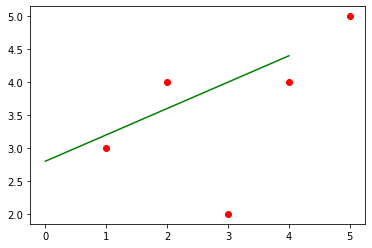

In [7]:
plt.scatter(df['x'],df['Ay'],color='red')
plt.plot(ypred,color='green')
plt.show()

In [8]:
R2=sum((ypred-ymean)**2)/sum((y-ymean)**2)
R2

0.3076923076923078

# Simple Linear Regression

In [9]:
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [11]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [12]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20,random_state=0)

In [13]:
#Step1: import the model (class) from the package
from sklearn.linear_model import LinearRegression

#Step2: create an object for the linearRegression
linreg = LinearRegression()

#Step3: train the data (find the value of m and c) using fit method
linreg.fit(xtrain,ytrain)

#Step4 : Use predict
ypred = linreg.predict(xtest)


In [14]:
from sklearn.metrics import r2_score

print(f"Accuracy : {r2_score(ytest,ypred)}")

Accuracy : 0.988169515729126


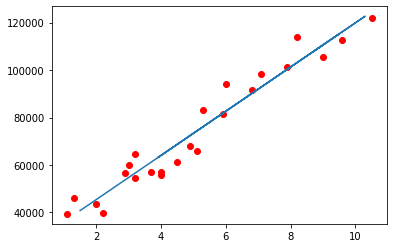

In [15]:
plt.scatter(xtrain,ytrain,color='red')
plt.plot(xtest,linreg.predict(xtest))
plt.show()

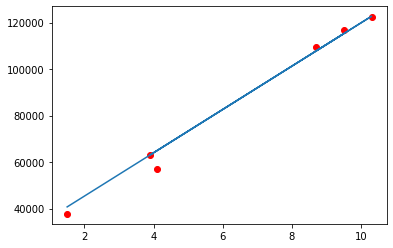

In [16]:
plt.scatter(xtest,ytest,color='red')
plt.plot(xtest,linreg.predict(xtest))
plt.show()

In [17]:
linreg.coef_

array([9312.57512673])

In [18]:
linreg.intercept_

26780.09915062818

# Multiple Linear Equation

In [19]:
df = pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [21]:
df.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [22]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [23]:
x = df.iloc[:,:-2]
y=df.iloc[:,-2]

In [24]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [25]:
#Step1: import the model (class) from the package
from sklearn.linear_model import LinearRegression

#Step2: create an object for the linearRegression
linreg = LinearRegression()

#Step3: train the data (find the value of m and c) using fit method
linreg.fit(xtrain,ytrain)

#Step4 : Use predict
ypred = linreg.predict(xtest)

In [26]:
from sklearn.metrics import r2_score
print(f"Accuracy : {r2_score(ytest,ypred)}")

Accuracy : 0.9215935236936348


<AxesSubplot:xlabel='Price'>

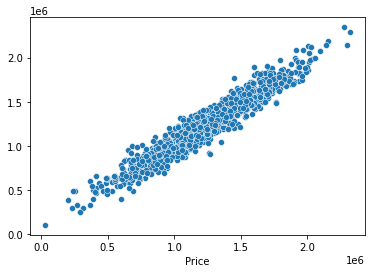

In [27]:
sns.scatterplot(ytest,ypred)

<AxesSubplot:xlabel='Price', ylabel='Density'>

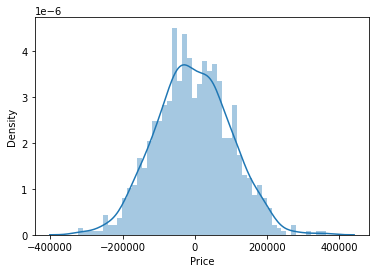

In [28]:
sns.distplot((ytest-ypred),bins=50)

In [29]:
linreg.coef_

array([2.16667346e+01, 1.64990052e+05, 1.20784238e+05, 1.54252468e+03,
       1.51503697e+01])

In [30]:
linreg.intercept_

-2637185.64007627

In [31]:
df_coef = pd.DataFrame(linreg.coef_,x.columns,columns=["Coefficient"])
df_coef

,Coefficient
Avg. Area Income,21.666735
Avg. Area House Age,164990.051829
Avg. Area Number of Rooms,120784.238317
Avg. Area Number of Bedrooms,1542.524676
Area Population,15.150370


In [32]:
from sklearn.metrics import mean_absolute_error as mae ,mean_squared_error as mse, r2_score

mae = mae(ypred,ytest)
mse = mse(ypred,ytest)
rmse = np.sqrt(mse)
accuracy = r2_score(ypred,ytest)

print('Mean_Absolute_Error :',mae)
print('Mean_Squared_Error :',mse)
print('Root_Mean_Squared_Error :',rmse)
print('Acuracy :',accuracy)

Mean_Absolute_Error : 82494.73770125103
Mean_Squared_Error : 10543597313.62491
Root_Mean_Squared_Error : 102682.0204009685
Acuracy : 0.915276726610807
